In [39]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
plt.style.use('fivethirtyeight')

In [40]:
# load data
tweet_sentiments_df = pd.read_csv('/Users/floramatos/Desktop/Final_Project/Files/resources/dataset/tweet_sentiments_consolidated.csv')
tweet_sentiments_df.head(5)

,location,tweetcreatedts,text,country,neg,neu,pos,compound,sentiment
0,India,2022-03-01,urges government to rescue student along wit...,india,0.000,0.769,0.231,0.5106,positive
1,"Stoney Creek, Ontario",2022-03-01,moscow underground sometimes the act of resis...,canada,0.000,0.880,0.120,0.3818,positive
2,"Los Angeles, CA",2022-03-01,via video game industry shares support for u...,usa,0.219,0.506,0.275,0.0000,neutral
3,Australia,2022-03-01,tomlinson had planned stops in kyiv on july ...,australia,0.127,0.873,0.000,-0.1531,negative
4,Ukraine,2022-03-01,stop russian aggression against close the ...,ukraine,0.320,0.558,0.122,-0.4404,negative


In [41]:
# define function to edit large tick values
def edit_tick_values(tick_val, pos):
    if tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val
    
    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

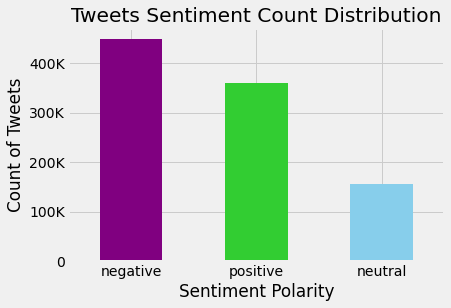

<Figure size 1152x648 with 0 Axes>

In [42]:
# Plot sentiment count distribution
sentiment_count = tweet_sentiments_df['sentiment'].value_counts()
sentiment_count.plot(kind='bar',rot=0,color=['purple','limegreen','skyblue'])
plt.title('Tweets Sentiment Count Distribution')
plt.ylabel('Count of Tweets')
plt.xlabel('Sentiment Polarity')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values))
plt.figure(figsize=(16,9))
plt.show()

In [43]:
# Save image
# plt.savefig("resources/images/sentiment_distribution.png")

<Figure size 432x288 with 0 Axes>

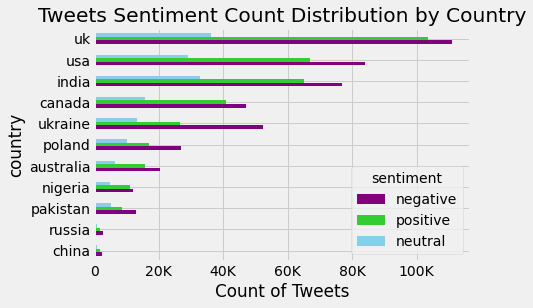

<Figure size 1152x648 with 0 Axes>

In [47]:
# plot sentiment count distribution by country
sentiment_by_country = pd.crosstab(tweet_sentiments_df['country'],tweet_sentiments_df['sentiment'])
sentiment_by_country['total'] = sentiment_by_country['positive'] + sentiment_by_country['negative'] + sentiment_by_country['neutral']
result = sentiment_by_country.sort_values('total').drop(columns='total')
result = result[['negative', 'positive', 'neutral']]
result.plot(kind='barh',rot=0,color=['purple', 'limegreen', 'skyblue'])
plt.title('Tweets Sentiment Count Distribution by Country')
plt.xlabel('Country')
plt.xlabel('Count of Tweets')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(edit_tick_values))
plt.figure(figsize=(16,9))
plt.show()

In [44]:
result

sentiment,negative,neutral,positive
country,,,
china,2417,932,1910
russia,2615,943,1830
pakistan,12897,5278,8639
nigeria,11892,4856,11198
australia,20360,6559,15845
poland,26931,10280,17126
ukraine,52484,13275,26521
canada,47115,15788,40983
india,76729,32741,65220


In [38]:
# Save image
# plt.savefig("resources/images/sentiment_distribution_by_country.png")

<Figure size 432x288 with 0 Axes>

## heatmap

### Import Dataset

### Select data required for heatmap into a dataframe

In [ ]:
pd.set_option('display.max_rows', None)
analysis_df = tweet_sentiments_df.groupby(['tweetcreatedts','country']).mean(['compound'])
new_analysis_df = analysis_df[['compound']]
new_analysis_df.reset_index(inplace=True)
new_analysis_df

,tweetcreatedts,country,compound
0,2022-02-24,australia,-0.098048
1,2022-02-24,canada,-0.100574
2,2022-02-24,china,-0.007594
3,2022-02-24,india,-0.086370
4,2022-02-24,nigeria,-0.072358
5,2022-02-24,pakistan,-0.114958
6,2022-02-24,poland,-0.131078
7,2022-02-24,russia,-0.074399
8,2022-02-24,uk,-0.102638
9,2022-02-24,ukraine,-0.148162


### Create pivot table for heatmap

In [ ]:
heatmap_pivot = new.pivot('country','tweetcreatedts','compound')
heatmap_pivot

tweetcreatedts,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,...,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18
country,,,,,,,,,,,,,,,,,,,,,
australia,-0.098048,-0.091019,-0.046142,-0.040483,-0.050813,-0.076864,-0.109712,-0.068128,-0.071365,-0.052941,...,-0.071631,-0.069755,-0.113286,-0.082268,-0.133595,-0.164771,-0.082017,-0.101559,-0.065718,-0.101108
canada,-0.100574,-0.030937,0.003441,-0.015250,-0.015093,-0.041337,-0.080691,-0.062977,-0.094812,-0.039393,...,-0.086178,-0.068608,-0.068675,-0.070871,-0.147291,-0.104559,-0.019290,-0.047702,0.022287,-0.044853
china,-0.007594,-0.123246,-0.095391,-0.145012,0.002628,-0.077532,-0.080451,-0.047325,-0.113692,-0.107792,...,-0.069974,-0.149136,-0.057025,-0.126962,-0.070259,-0.106525,-0.027837,-0.078029,0.012271,-0.055850
india,-0.086370,-0.075494,0.001989,-0.011349,-0.067705,-0.114111,-0.033015,-0.040119,-0.098812,-0.036915,...,0.051225,-0.040934,-0.017432,-0.099287,-0.131333,-0.127660,-0.094496,-0.091962,-0.084114,-0.096250
nigeria,-0.072358,-0.033129,0.092476,0.026488,-0.016737,-0.099341,-0.042335,-0.053367,-0.080930,0.063564,...,-0.063807,-0.072252,-0.237306,-0.013033,-0.077478,-0.003745,-0.048268,-0.091721,-0.008980,-0.008224
pakistan,-0.114958,-0.105732,-0.107290,-0.093829,-0.140383,-0.216724,-0.147399,-0.131905,-0.161108,-0.038498,...,-0.092046,-0.195670,0.016400,-0.130577,-0.188503,-0.199314,-0.112448,-0.089402,-0.183710,-0.091905
poland,-0.131078,-0.078033,-0.071382,-0.135025,-0.071971,-0.158088,-0.224240,-0.135650,-0.047253,-0.041417,...,-0.109421,-0.098366,-0.127801,-0.118833,-0.148166,-0.027116,-0.062634,-0.171026,-0.100379,-0.084735
russia,-0.074399,-0.153563,-0.067247,-0.142421,-0.070078,-0.095356,-0.141220,-0.050214,-0.099352,-0.106407,...,-0.097014,-0.154681,-0.128593,-0.085069,-0.130906,-0.240606,-0.207177,-0.044847,-0.150057,-0.066572
uk,-0.102638,-0.014140,0.012240,0.018696,-0.042325,-0.070285,-0.095543,-0.021674,0.001980,0.032087,...,-0.083742,-0.078607,-0.055101,-0.021527,-0.054506,-0.041884,0.022397,-0.017308,0.020781,-0.056969


### Create a heatmap using Matplotlib

/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_15028/1848348079.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(heatmap_pivot.columns,rotation=45)
/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_15028/1848348079.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(heatmap_pivot.index)


Text(0, 0.5, 'Country names')

<Figure size 432x288 with 0 Axes>

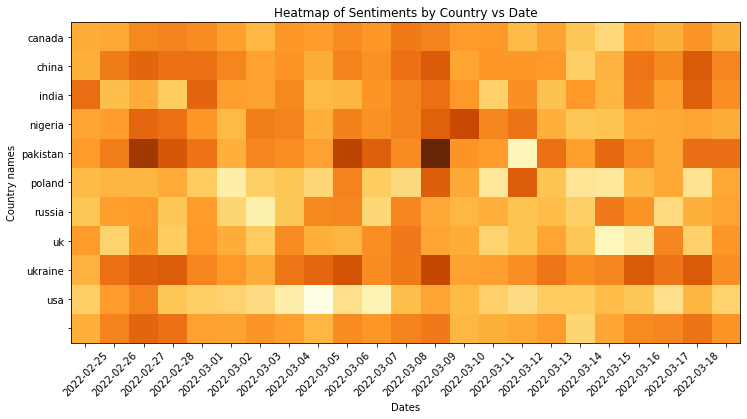

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,12))
heatplot = ax.imshow(heatmap_pivot, cmap='YlOrBr')
ax.set_xticklabels(heatmap_pivot.columns,rotation=45)
ax.set_yticklabels(heatmap_pivot.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title('Heatmap of Sentiments by Country vs Date')
ax.set_xlabel('Dates')
ax.set_ylabel('Country names')